In [1]:
## Install pandas datareader
#!pip install pandas-datareader

# EDA - Exploratory Data Analysis with Time Series 

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
df = pd.read_csv("Temp Data.csv")

In [4]:
df

,Date and Time,degree celsius,Fahrenhite
0,[2022-06-01 13:02:27.123],22.0,71.6
1,[2022-06-01 13:02:27.128],22.0,71.6
2,[2022-06-01 13:02:27.128],22.0,71.6
3,[2022-06-01 13:02:27.128],22.0,71.6
4,[2022-06-01 13:02:27.128],22.0,71.6
...,...,...,...
2915,[2022-06-01 14:10:52.868],22.5,72.5
2916,[2022-06-01 14:10:53.960],22.5,72.5
2917,[2022-06-01 14:10:55.044],22.5,72.5
2918,[2022-06-01 14:10:56.132],22.5,72.5


In [5]:
# To check null values and it shows 0 null value
df.isnull().sum()

Date and Time     0
degree celsius    0
Fahrenhite        0
dtype: int64

In [6]:
df['Date and Time'] = df['Date and Time'].str.replace('[',"")
df['Date and Time'] = df['Date and Time'].str.replace(']',"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [7]:
# new data frame with split value columns 
new_data = df['Date and Time'].str.split(".", n=1, expand=True)

# making new column Date from first part of the split data, 
# also remove front and back brackets if any
df["dt"] = new_data[0]
df.drop('Date and Time',axis=1,inplace=True)
# print data
print(df)


      degree celsius  Fahrenhite                   dt
0               22.0        71.6  2022-06-01 13:02:27
1               22.0        71.6  2022-06-01 13:02:27
2               22.0        71.6  2022-06-01 13:02:27
3               22.0        71.6  2022-06-01 13:02:27
4               22.0        71.6  2022-06-01 13:02:27
...              ...         ...                  ...
2915            22.5        72.5  2022-06-01 14:10:52
2916            22.5        72.5  2022-06-01 14:10:53
2917            22.5        72.5  2022-06-01 14:10:55
2918            22.5        72.5  2022-06-01 14:10:56
2919            22.5        72.5  2022-06-01 14:10:57

[2920 rows x 3 columns]


In [8]:
df['dt']=pd.to_datetime(df['dt'],errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [9]:
# Let's set datetime as index
df.set_index('dt', inplace = True)

In [10]:
df

,degree celsius,Fahrenhite
dt,,
2022-06-01 13:02:27,22.0,71.6
2022-06-01 13:02:27,22.0,71.6
2022-06-01 13:02:27,22.0,71.6
2022-06-01 13:02:27,22.0,71.6
2022-06-01 13:02:27,22.0,71.6
...,...,...
2022-06-01 14:10:52,22.5,72.5
2022-06-01 14:10:53,22.5,72.5
2022-06-01 14:10:55,22.5,72.5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2920 entries, 2022-06-01 13:02:27 to 2022-06-01 14:10:57
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   degree celsius  2920 non-null   float64
 1   Fahrenhite      2920 non-null   float64
dtypes: float64(2)
memory usage: 68.4 KB


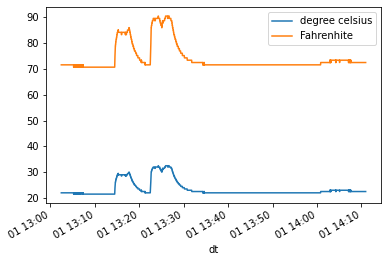

In [12]:
df.plot()

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.head()

,degree celsius,Fahrenhite
dt,,
2022-06-01 13:02:27,22.0,71.6
2022-06-01 13:02:27,22.0,71.6
2022-06-01 13:02:27,22.0,71.6
2022-06-01 13:02:27,22.0,71.6
2022-06-01 13:02:27,22.0,71.6


In [15]:
df.tail() # Data in bold says it is indexed-x-axis

,degree celsius,Fahrenhite
dt,,
2022-06-01 14:10:52,22.5,72.5
2022-06-01 14:10:53,22.5,72.5
2022-06-01 14:10:55,22.5,72.5
2022-06-01 14:10:56,22.5,72.5
2022-06-01 14:10:57,22.5,72.5


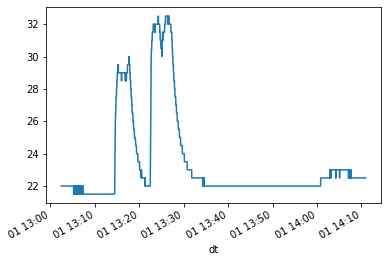

In [16]:
df['degree celsius'].plot() # To plot any specific column

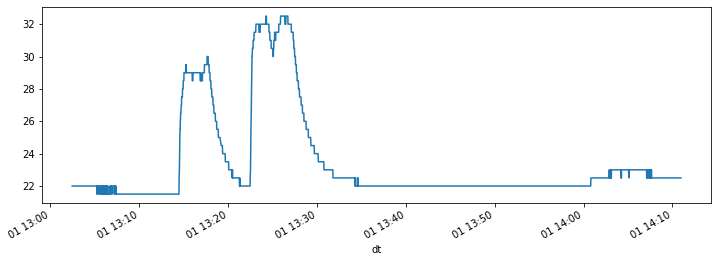

In [17]:
df['degree celsius'].plot(figsize=(12,4)) # to have a large figure

In [18]:
# Draw subplots
# For executing it - inline command
import matplotlib.pyplot as plt
%matplotlib inline 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2920 entries, 2022-06-01 13:02:27 to 2022-06-01 14:10:57
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   degree celsius  2920 non-null   float64
 1   Fahrenhite      2920 non-null   float64
dtypes: float64(2)
memory usage: 68.4 KB


# Time Resampling

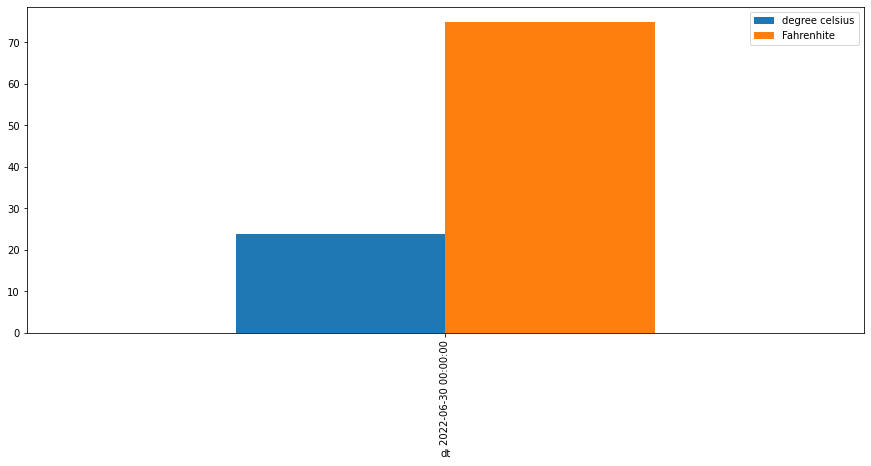

In [20]:
df.resample(rule = 'M').mean().plot(kind = 'bar', figsize=(15,6))

In [21]:
# axis = 0 for rows, 1 for columns
# Rolling, 10 for mean of 10 datapoints, first 10 give mean and then mean of previous 10 for the next pt
df.rolling(10).mean().head(20)

,degree celsius,Fahrenhite
dt,,
2022-06-01 13:02:27,NaN,NaN
2022-06-01 13:02:27,NaN,NaN
2022-06-01 13:02:27,NaN,NaN
2022-06-01 13:02:27,NaN,NaN
2022-06-01 13:02:27,NaN,NaN
2022-06-01 13:02:27,NaN,NaN
2022-06-01 13:02:27,NaN,NaN
2022-06-01 13:02:27,NaN,NaN
2022-06-01 13:02:27,NaN,NaN


In [22]:
df['C: 30 window rolling'] = df['degree celsius'].rolling(30).mean()
df['F: 30 window rolling'] = df['Fahrenhite'].rolling(30).mean()

In [23]:
df

,degree celsius,Fahrenhite,C: 30 window rolling,F: 30 window rolling
dt,,,,
2022-06-01 13:02:27,22.0,71.6,NaN,NaN
2022-06-01 13:02:27,22.0,71.6,NaN,NaN
2022-06-01 13:02:27,22.0,71.6,NaN,NaN
2022-06-01 13:02:27,22.0,71.6,NaN,NaN
2022-06-01 13:02:27,22.0,71.6,NaN,NaN
...,...,...,...,...
2022-06-01 14:10:52,22.5,72.5,22.5,72.5
2022-06-01 14:10:53,22.5,72.5,22.5,72.5
2022-06-01 14:10:55,22.5,72.5,22.5,72.5


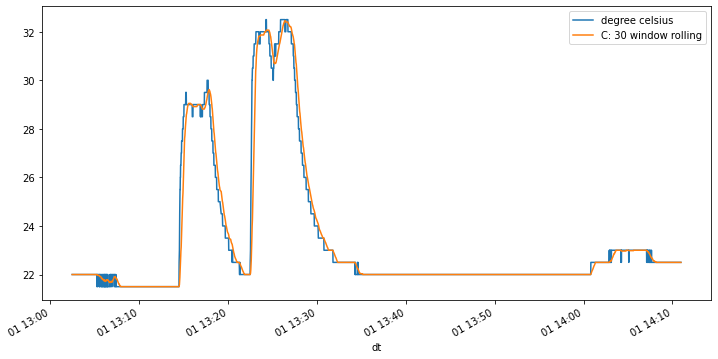

In [24]:
df[['degree celsius', 'C: 30 window rolling']].plot(figsize=(12,6)) # The orange graph shows smoother curve due to rolling

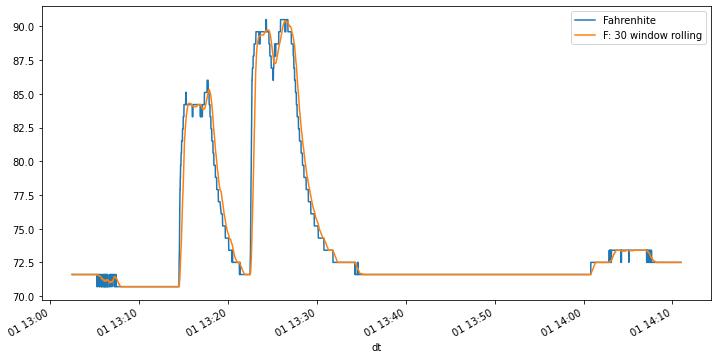

In [25]:
df[['Fahrenhite', 'F: 30 window rolling']].plot(figsize=(12,6)) # The orange graph shows smoother curve due to rolling

# Simple Moving Average

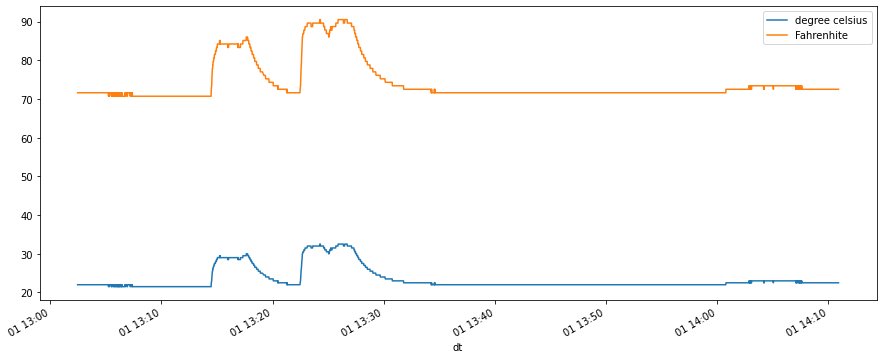

In [26]:
df[['degree celsius','Fahrenhite']].plot(figsize= (15, 6))

In [27]:
df['C: 10 rolling'] = df['degree celsius'].rolling(window=10, min_periods = 1).mean() # min period-instead of nan, avg is taken

In [28]:
df.head()

,degree celsius,Fahrenhite,C: 30 window rolling,F: 30 window rolling,C: 10 rolling
dt,,,,,
2022-06-01 13:02:27,22.0,71.6,NaN,NaN,22.0
2022-06-01 13:02:27,22.0,71.6,NaN,NaN,22.0
2022-06-01 13:02:27,22.0,71.6,NaN,NaN,22.0
2022-06-01 13:02:27,22.0,71.6,NaN,NaN,22.0
2022-06-01 13:02:27,22.0,71.6,NaN,NaN,22.0


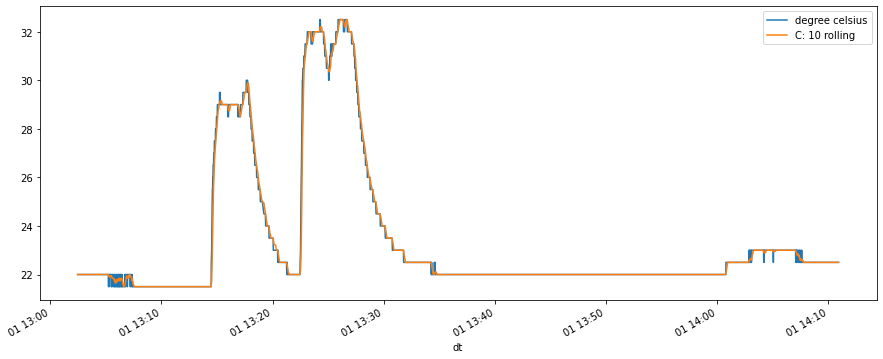

In [29]:
df[['degree celsius', 'C: 10 rolling']].plot(figsize = (15, 6))

In [30]:
# SMA used for short term prediction in stock markets
df['C: 5 rolling'] = df['degree celsius'].rolling(window=5, min_periods = 1).mean()
df['C: 20 rolling'] = df['degree celsius'].rolling(window=20, min_periods = 1).mean()
df['C: 30 rolling'] = df['degree celsius'].rolling(window=30, min_periods = 1).mean()
df['C: 40 rolling'] = df['degree celsius'].rolling(window=40, min_periods = 1).mean()
df['C: 50 rolling'] = df['degree celsius'].rolling(window=50, min_periods = 1).mean()

In [31]:
df.head()

,degree celsius,Fahrenhite,C: 30 window rolling,F: 30 window rolling,C: 10 rolling,C: 5 rolling,C: 20 rolling,C: 30 rolling,C: 40 rolling,C: 50 rolling
dt,,,,,,,,,,
2022-06-01 13:02:27,22.0,71.6,NaN,NaN,22.0,22.0,22.0,22.0,22.0,22.0
2022-06-01 13:02:27,22.0,71.6,NaN,NaN,22.0,22.0,22.0,22.0,22.0,22.0
2022-06-01 13:02:27,22.0,71.6,NaN,NaN,22.0,22.0,22.0,22.0,22.0,22.0
2022-06-01 13:02:27,22.0,71.6,NaN,NaN,22.0,22.0,22.0,22.0,22.0,22.0
2022-06-01 13:02:27,22.0,71.6,NaN,NaN,22.0,22.0,22.0,22.0,22.0,22.0


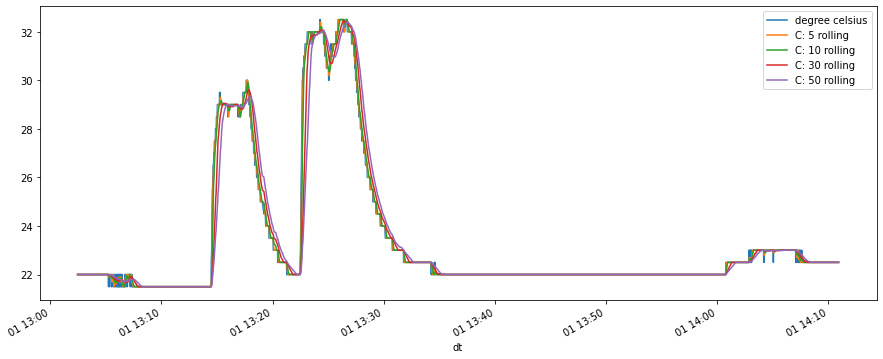

In [32]:
df[['degree celsius','C: 5 rolling', 'C: 10 rolling', 'C: 30 rolling', 'C: 50 rolling']].plot(figsize = (15, 6))

# Cumulative Moving Average (CMA)

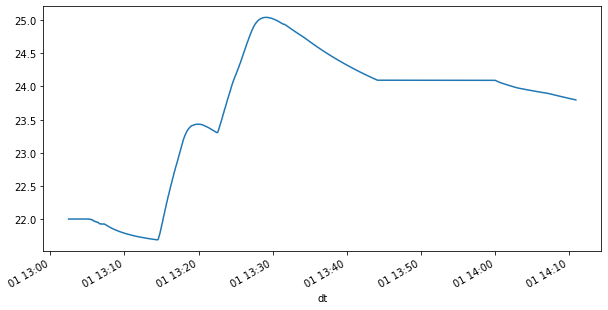

In [33]:
# Expanding
# expanding - Cumulative Moving Average (CMA)
df['degree celsius'].expanding().mean().plot(figsize = (10, 5))

# Exponential Wieghted Moving Average (EWMA)
Formula for Exponential Moving Average = ((value - prev EMA)*multiplier) + prev EMA
MULTIPLIER = 2/(window size + 1)

EWMA: EMWA(t) = a * x(t) + (1-a)*EMWA(t-1) ; a-weight to prevent any kind of lags, EMWA(t-1) - previous data

In [34]:
# EMA
df["EMA_0.1"] = df['degree celsius'].ewm(alpha = 0.1, adjust = False).mean()

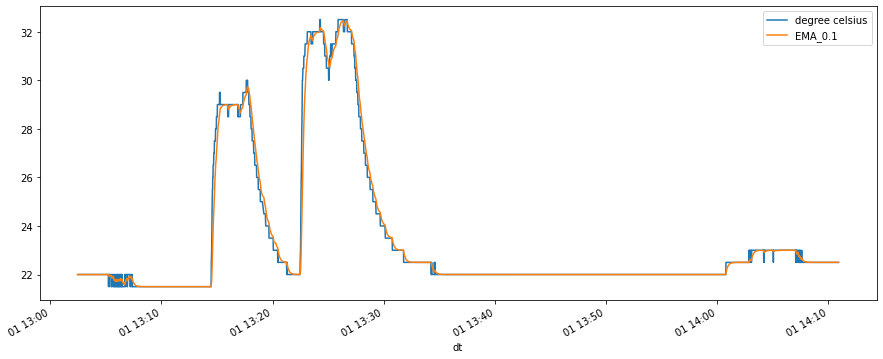

In [35]:
# Lags are nt there unlike SMA
df[['degree celsius', 'EMA_0.1']].plot(figsize = (15, 6))

In [36]:
df["EMA_0.3"] = df['degree celsius'].ewm(alpha = 0.3, adjust = False).mean()

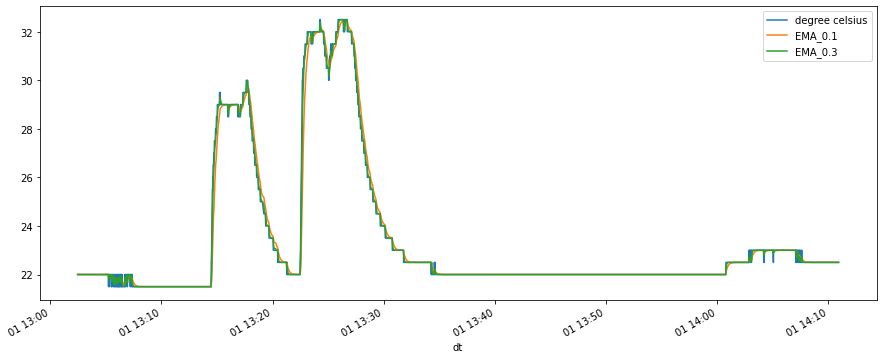

In [37]:
df[['degree celsius', 'EMA_0.1', 'EMA_0.3']].plot(figsize = (15, 6))

In [38]:
# EWMA
df["EMA_5 min"] = df['degree celsius'].ewm(span = 5).mean() # SPAN is multiplier - 2/(w+1)

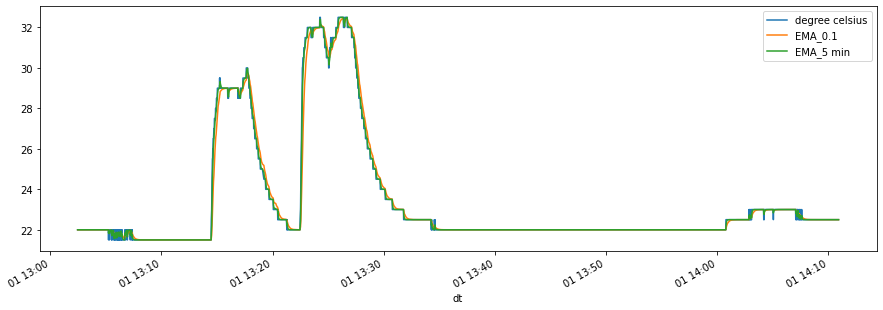

In [39]:
df[['degree celsius', 'EMA_0.1','EMA_5 min']].plot(figsize = (15, 5))

# Linear Regression

In [40]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.1 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=2e5a5136a69e3fcc1cb97878a712ca59f3d41f271e56418cda99ab09b612cd77
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [41]:
import pandas_ta

In [42]:
!pip install sklearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=916f20e78328b93d62975d49417f3746ec2fe63f6dedbe963729e08c80cd0d75
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Split data into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(df[['degree celsius']], df[['EMA_5 min']], test_size=.2)
# Test set
print(X_test.describe())

       degree celsius
count      584.000000
mean        23.600171
std          3.013233
min         21.500000
25%         22.000000
50%         22.500000
75%         23.000000
max         32.500000


In [45]:
# Training set
print(X_train.describe())

       degree celsius
count     2336.000000
mean        23.845462
std          3.229495
min         21.500000
25%         22.000000
50%         22.500000
75%         23.500000
max         32.500000


In [46]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.99895928]]
Mean Absolute Error: 0.03885736387100675
Coefficient of Determination: 0.9982878426592494


In [49]:
import csv

header = [X_test]
data = [y_pred]


with open('/content/PredictedTemp.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data
    writer.writerow(data)
    f.close()

In [50]:
df = pd.read_csv("PredictedTemp.csv")

In [51]:
df

,degree celsius\ndt \n2022-06-01 13:06:11 21.5\n2022-06-01 13:43:43 22.0\n2022-06-01 13:07:19 21.5\n2022-06-01 13:08:14 21.5\n2022-06-01 13:32:09 22.5\n... ...\n2022-06-01 13:41:02 22.0\n2022-06-01 14:07:05 23.0\n2022-06-01 13:18:50 25.5\n2022-06-01 13:18:04 28.0\n2022-06-01 13:12:17 21.5\n\n[584 rows x 1 columns]
0,[[21.50230992]\n [22.00178956]\n [21.50230992]...


# R2 score with Exponential moving average and linear regression: 0.9984368885830587. 
# Best fit.